## Global Landslide Catalog Export

This dataset lists out all software in use by NASA
The Global Landslide Catalog (GLC) was developed with the goal of identifying rainfall-triggered landslide events around the world, regardless of size, impacts or location. The GLC considers all types of mass movements triggered by rainfall, which have been reported in the media, disaster databases, scientific reports, or other sources. The GLC has been compiled since 2007 at NASA Goddard Space Flight Center. This is a unique data set with the ID tag “GLC” in the landslide editor.

This dataset on data.nasa.gov was a one-time export from the Global Landslide Catalog maintained separately. It is current as of March 7, 2016. The original catalog is available [here](http://www.arcgis.com/home/webmap/viewer.html?url=https%3A%2F%2Fmaps.nccs.nasa.gov%2Fserver%2Frest%2Fservices%2Fglobal_landslide_catalog%2Fglc_viewer_service%2FFeatureServer&source=sd)

To export GLC data, you must agree to the “Terms and Conditions”. We request that anyone using the GLC cite the two sources of this database:

Kirschbaum, D. B., Adler, R., Hong, Y., Hill, S., & Lerner-Lam, A. (2010). A global landslide catalog for hazard applications: method, results, and limitations. Natural Hazards, 52(3), 561–575.]

Kirschbaum, D.B., T. Stanley, Y. Zhou (In press, 2015). Spatial and Temporal Analysis of a Global Landslide Catalog. Geomorphology. 

In [1]:
from platform import python_version
print(python_version())

3.6.8


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import math
from math import*
from numpy import log as ln
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd
from pylab import * 
from scipy import *
import seaborn as sns
import json, requests


Bad key "text.kerning_factor" on line 4 in
/home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Importing and reading data from Nasa api

In [3]:
data = pd.read_json ("https://data.nasa.gov/resource/dd9e-wu2v.json")
data

,admin_division_name,admin_division_population,country_code,country_name,created_date,event_date,event_description,event_id,event_import_id,event_import_source,...,latitude,location_accuracy,location_description,longitude,notes,photo_link,source_link,source_name,storm_name,submitted_date
0,Southland,1651.0,NZ,New Zealand,2017-11-20T15:17:00.000,2014-05-20T00:00:00.000,A landslide on Codfish Island has killed Maggi...,6034,6034.0,glc,...,-46.774800,5km,Codfish Island,167.633700,NaN,{'url': 'http://blogs.agu.org/landslideblog/fi...,{'url': 'http://www.3news.co.nz/Kakapo-Maggie-...,3 News,NaN,2015-01-07T20:02:00.000
1,Otago,2009.0,NZ,New Zealand,2017-11-20T15:17:00.000,2010-05-29T06:45:00.000,"Elsewhere, a landslide slammed into a building...",1910,1910.0,glc,...,-45.903400,10km,"Berwick Camp, Otago region",170.098200,NaN,NaN,{'url': 'http://www.odt.co.nz/news/dunedin/108...,Otago Daily Times,NaN,2016-01-08T19:34:00.000
2,Otago,1200.0,NZ,New Zealand,2017-11-20T15:17:00.000,2015-06-04T00:00:00.000,Police estimated five sections of Highcliff ro...,6997,6997.0,glc,...,-45.876700,5km,Highcliff Road,170.627300,NaN,NaN,{'url': 'http://www.stuff.co.nz/national/69094...,Stuff.co,NaN,2015-06-26T20:32:00.000
3,Otago,1200.0,NZ,New Zealand,2017-11-20T15:17:00.000,2013-06-17T00:00:00.000,"Two days of heavy rain shut down North Otago, ...",4941,4941.0,glc,...,-45.872700,5km,"Portobello Rd., Dunedin, Otago Peninsula",170.586300,NaN,NaN,{'url': 'http://www.radionz.co.nz/news/nationa...,www.radionz.co.nz,NaN,2014-04-01T00:00:00.000
4,Otago,114347.0,NZ,New Zealand,2017-11-20T15:17:00.000,2014-05-01T04:00:00.000,Five students living in a Dunedin house had an...,6008,6008.0,glc,...,-45.861800,1km,"Queen Street, Dunedin",170.509000,NaN,NaN,{'url': 'http://www.3news.co.nz/Landslide-cras...,3 News,NaN,2014-08-24T00:00:00.000
5,Chubut,140850.0,AR,Argentina,2017-11-20T15:17:00.000,2010-02-17T00:00:00.000,A mudslide hit the town of Comodoro Rivadavia ...,1510,1510.0,glc,...,-45.858000,10km,Comodoro Rivadavia in Chubut province,-67.507800,NaN,NaN,{'url': 'http://momento24.com/en/2010/02/18/mu...,momento24.com,NaN,2014-04-01T00:00:00.000
6,Otago,1200.0,NZ,New Zealand,2017-11-20T15:17:00.000,2010-05-29T02:00:00.000,Flood conditions are easing in some coastal Ot...,1911,1911.0,glc,...,-45.845600,5km,"Portobello rd between Portobello and Dunedin, ...",170.632800,NaN,NaN,{'url': 'http://www.odt.co.nz/news/dunedin/108...,odt,NaN,2014-04-01T00:00:00.000
7,Otago,1200.0,NZ,New Zealand,2017-11-20T15:17:00.000,2013-06-17T00:00:00.000,"Two days of heavy rain shut down North Otago, ...",4942,4942.0,glc,...,-45.835800,5km,"Harrington Point Rd., Dunedin, Otago Peninsula",170.664600,NaN,NaN,{'url': 'http://www.radionz.co.nz/news/nationa...,www.radionz.co.nz,NaN,2014-04-01T00:00:00.000
8,Otago,1200.0,NZ,New Zealand,2017-11-20T15:17:00.000,2013-06-19T22:00:00.000,Two landslips which came down in Dunedin last ...,4962,4962.0,glc,...,-45.824300,exact,"Upper Junction Road And 187 Blanket Bay Rd., D...",170.595700,NaN,NaN,{'url': 'http://tvnz.co.nz/national-news/duned...,tvnz.co.nz,NaN,2014-04-01T00:00:00.000
9,Otago,1200.0,NZ,New Zealand,2017-11-20T15:17:00.000,2013-06-20T00:00:00.000,Rain is still lashing the sodden Otago region ...,4969,4969.0,glc,...,-45.823700,1km,"Blanket Bay Road Area, Otago Region, Dunedin",170.597200,NaN,NaN,{'url': 'http://www.3news.co.nz/Mudslide-force...,www.3news.co.nz,NaN,2014-04-01T00:00:00.000


### Getting some dataset information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
admin_division_name          852 non-null object
admin_division_population    852 non-null float64
country_code                 852 non-null object
country_name                 852 non-null object
created_date                 1000 non-null object
event_date                   1000 non-null object
event_description            995 non-null object
event_id                     1000 non-null int64
event_import_id              852 non-null float64
event_import_source          852 non-null object
event_title                  1000 non-null object
fatality_count               890 non-null float64
gazeteer_closest_point       852 non-null object
gazeteer_distance            852 non-null float64
injury_count                 328 non-null float64
landslide_category           1000 non-null object
landslide_setting            986 non-null object
landslide_size               997 non-null object
lan

### Cleanning  dataset

In [5]:
data.drop(['created_date','event_import_id','event_import_source','notes','photo_link','source_link','last_edited_date', 'location_description', ], axis=1, inplace=True)
data

,admin_division_name,admin_division_population,country_code,country_name,event_date,event_description,event_id,event_title,fatality_count,gazeteer_closest_point,...,landslide_category,landslide_setting,landslide_size,landslide_trigger,latitude,location_accuracy,longitude,source_name,storm_name,submitted_date
0,Southland,1651.0,NZ,New Zealand,2014-05-20T00:00:00.000,A landslide on Codfish Island has killed Maggi...,6034,Codfish Island,0.0,Riverton,...,landslide,natural_slope,small,downpour,-46.774800,5km,167.633700,3 News,NaN,2015-01-07T20:02:00.000
1,Otago,2009.0,NZ,New Zealand,2010-05-29T06:45:00.000,"Elsewhere, a landslide slammed into a building...",1910,"Berwick Camp, Otago region",0.0,Milton,...,landslide,unknown,medium,downpour,-45.903400,10km,170.098200,Otago Daily Times,NaN,2016-01-08T19:34:00.000
2,Otago,1200.0,NZ,New Zealand,2015-06-04T00:00:00.000,Police estimated five sections of Highcliff ro...,6997,Highcliff Road,0.0,Portobello,...,landslide,below_road,medium,downpour,-45.876700,5km,170.627300,Stuff.co,NaN,2015-06-26T20:32:00.000
3,Otago,1200.0,NZ,New Zealand,2013-06-17T00:00:00.000,"Two days of heavy rain shut down North Otago, ...",4941,"Portobello Rd., Dunedin, Otago Peninsula",0.0,Portobello,...,landslide,unknown,medium,downpour,-45.872700,5km,170.586300,www.radionz.co.nz,NaN,2014-04-01T00:00:00.000
4,Otago,114347.0,NZ,New Zealand,2014-05-01T04:00:00.000,Five students living in a Dunedin house had an...,6008,"Queen Street, Dunedin",0.0,Dunedin,...,landslide,unknown,small,rain,-45.861800,1km,170.509000,3 News,NaN,2014-08-24T00:00:00.000
5,Chubut,140850.0,AR,Argentina,2010-02-17T00:00:00.000,A mudslide hit the town of Comodoro Rivadavia ...,1510,Comodoro Rivadavia in Chubut province,3.0,Comodoro Rivadavia,...,mudslide,unknown,medium,downpour,-45.858000,10km,-67.507800,momento24.com,NaN,2014-04-01T00:00:00.000
6,Otago,1200.0,NZ,New Zealand,2010-05-29T02:00:00.000,Flood conditions are easing in some coastal Ot...,1911,"Portobello rd between Portobello and Dunedin, ...",0.0,Portobello,...,landslide,unknown,medium,downpour,-45.845600,5km,170.632800,odt,NaN,2014-04-01T00:00:00.000
7,Otago,1200.0,NZ,New Zealand,2013-06-17T00:00:00.000,"Two days of heavy rain shut down North Otago, ...",4942,"Harrington Point Rd., Dunedin, Otago Peninsula",0.0,Portobello,...,landslide,unknown,medium,downpour,-45.835800,5km,170.664600,www.radionz.co.nz,NaN,2014-04-01T00:00:00.000
8,Otago,1200.0,NZ,New Zealand,2013-06-19T22:00:00.000,Two landslips which came down in Dunedin last ...,4962,"Upper Junction Road And 187 Blanket Bay Rd., D...",0.0,Portobello,...,landslide,unknown,medium,downpour,-45.824300,exact,170.595700,tvnz.co.nz,NaN,2014-04-01T00:00:00.000
9,Otago,1200.0,NZ,New Zealand,2013-06-20T00:00:00.000,Rain is still lashing the sodden Otago region ...,4969,"Blanket Bay Road Area, Otago Region, Dunedin",0.0,Portobello,...,mudslide,unknown,medium,downpour,-45.823700,1km,170.597200,www.3news.co.nz,NaN,2014-04-01T00:00:00.000


In [6]:
data_land = data['event_date'].str.split('-', expand=True)
data_land = data.join(data_land).rename(columns={0:'year', 1:'month', 2:'time'})
data_land.drop(['submitted_date','event_date','month', 'time'], axis=1, inplace=True)
data_land

,admin_division_name,admin_division_population,country_code,country_name,event_description,event_id,event_title,fatality_count,gazeteer_closest_point,gazeteer_distance,...,landslide_category,landslide_setting,landslide_size,landslide_trigger,latitude,location_accuracy,longitude,source_name,storm_name,year
0,Southland,1651.0,NZ,New Zealand,A landslide on Codfish Island has killed Maggi...,6034,Codfish Island,0.0,Riverton,55.60925,...,landslide,natural_slope,small,downpour,-46.774800,5km,167.633700,3 News,NaN,2014
1,Otago,2009.0,NZ,New Zealand,"Elsewhere, a landslide slammed into a building...",1910,"Berwick Camp, Otago region",0.0,Milton,26.14437,...,landslide,unknown,medium,downpour,-45.903400,10km,170.098200,Otago Daily Times,NaN,2010
2,Otago,1200.0,NZ,New Zealand,Police estimated five sections of Highcliff ro...,6997,Highcliff Road,0.0,Portobello,3.45468,...,landslide,below_road,medium,downpour,-45.876700,5km,170.627300,Stuff.co,NaN,2015
3,Otago,1200.0,NZ,New Zealand,"Two days of heavy rain shut down North Otago, ...",4941,"Portobello Rd., Dunedin, Otago Peninsula",0.0,Portobello,5.55301,...,landslide,unknown,medium,downpour,-45.872700,5km,170.586300,www.radionz.co.nz,NaN,2013
4,Otago,114347.0,NZ,New Zealand,Five students living in a Dunedin house had an...,6008,"Queen Street, Dunedin",0.0,Dunedin,1.43901,...,landslide,unknown,small,rain,-45.861800,1km,170.509000,3 News,NaN,2014
5,Chubut,140850.0,AR,Argentina,A mudslide hit the town of Comodoro Rivadavia ...,1510,Comodoro Rivadavia in Chubut province,3.0,Comodoro Rivadavia,1.10777,...,mudslide,unknown,medium,downpour,-45.858000,10km,-67.507800,momento24.com,NaN,2010
6,Otago,1200.0,NZ,New Zealand,Flood conditions are easing in some coastal Ot...,1911,"Portobello rd between Portobello and Dunedin, ...",0.0,Portobello,1.42271,...,landslide,unknown,medium,downpour,-45.845600,5km,170.632800,odt,NaN,2010
7,Otago,1200.0,NZ,New Zealand,"Two days of heavy rain shut down North Otago, ...",4942,"Harrington Point Rd., Dunedin, Otago Peninsula",0.0,Portobello,1.94355,...,landslide,unknown,medium,downpour,-45.835800,5km,170.664600,www.radionz.co.nz,NaN,2013
8,Otago,1200.0,NZ,New Zealand,Two landslips which came down in Dunedin last ...,4962,"Upper Junction Road And 187 Blanket Bay Rd., D...",0.0,Portobello,5.09471,...,landslide,unknown,medium,downpour,-45.824300,exact,170.595700,tvnz.co.nz,NaN,2013
9,Otago,1200.0,NZ,New Zealand,Rain is still lashing the sodden Otago region ...,4969,"Blanket Bay Road Area, Otago Region, Dunedin",0.0,Portobello,5.03706,...,mudslide,unknown,medium,downpour,-45.823700,1km,170.597200,www.3news.co.nz,NaN,2013


In [7]:
data_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
admin_division_name          852 non-null object
admin_division_population    852 non-null float64
country_code                 852 non-null object
country_name                 852 non-null object
event_description            995 non-null object
event_id                     1000 non-null int64
event_title                  1000 non-null object
fatality_count               890 non-null float64
gazeteer_closest_point       852 non-null object
gazeteer_distance            852 non-null float64
injury_count                 328 non-null float64
landslide_category           1000 non-null object
landslide_setting            986 non-null object
landslide_size               997 non-null object
landslide_trigger            999 non-null object
latitude                     1000 non-null float64
location_accuracy            1000 non-null object
longitude                    1000 non-null float64
s

In [8]:
data_land.describe()

,admin_division_population,event_id,fatality_count,gazeteer_distance,injury_count,latitude,longitude
count,8.520000e+02,1000.000000,890.000000,852.000000,328.000000,1000.000000,1000.000000
mean,5.479155e+05,4737.687000,3.829213,12.941581,1.560976,-20.492648,67.614294
std,1.577956e+06,3420.530422,23.134080,18.345901,13.088359,12.486233,96.266062
min,0.000000e+00,2.000000,0.000000,0.003680,0.000000,-46.774800,-179.980766
25%,2.219250e+03,1673.750000,0.000000,2.209557,0.000000,-29.824300,-43.108025
50%,2.655000e+04,4146.500000,0.000000,6.323705,0.000000,-20.139833,107.819706
75%,1.536350e+05,6766.250000,1.750000,15.892985,0.000000,-7.710569,149.601325
max,1.002130e+07,11121.000000,424.000000,168.320980,225.000000,-4.060200,179.991364


In [9]:
data_land.sort_values(['year'],ascending=True)

,admin_division_name,admin_division_population,country_code,country_name,event_description,event_id,event_title,fatality_count,gazeteer_closest_point,gazeteer_distance,...,landslide_category,landslide_setting,landslide_size,landslide_trigger,latitude,location_accuracy,longitude,source_name,storm_name,year
858,Central Java,58448.0,ID,Indonesia,The worst recorded landslide incident occurred...,6437,SIJERUK,240.0,Weleri,14.97069,...,mudslide,natural_slope,medium,downpour,-6.934300,5km,110.196900,Jakarta Post,NaN,2006
998,Zamora-Chinchipe,15276.0,EC,Ecuador,"translated report from Spanish, details may be...",105,Zamora,NaN,Zamora,0.47714,...,landslide,unknown,medium,downpour,-4.065000,5km,-78.951000,Red Cross - Field reports,NaN,2007
46,Tasmania,1035.0,AU,Australia,news.com.au,171,Mount Black,NaN,Rosebery,1.38874,...,landslide,unknown,small,rain,-41.768900,10km,145.547300,news.com.au,NaN,2007
658,Milne Bay,10025.0,PG,Papua New Guinea,4 injured in house,327,"Alotau, Milne Bay province",5.0,Alotau,1.64816,...,landslide,unknown,medium,rain,-10.303800,10km,150.447600,thenational.com,NaN,2007
470,Rio de Janeiro,153361.0,BR,Brazil,"houses collapse, roof collapses, car buried, B...",3,"Nova Friburgo, Rio de Janeiro",7.0,Nova Friburgo,0.63016,...,landslide,unknown,large,rain,-22.282346,25km,-42.536362,Deutsche Presse-Agentur - MonstersandCritics,NaN,2007
654,Junín,14708.0,PE,Peru,(CBS/AP) At least 10 people died and as many a...,973,"San Ramon district, 195 miles northeast of the...",10.0,San Ramón,0.85548,...,landslide,unknown,large,downpour,-11.129500,10km,-75.358700,CBS News,NaN,2007
483,Rio de Janeiro,11555.0,BR,Brazil,"houses collapse, roof collapses, car buried, B...",4,"Sumidouro, Rio de Janeiro",2.0,Carmo,14.05144,...,landslide,unknown,medium,rain,-22.045200,10km,-42.673400,Deutsche Presse-Agentur - MonstersandCritics,NaN,2007
752,Central Java,50059.0,ID,Indonesia,"none killed, 30 homes destroyed, 177 people di...",402,"Tengklik village in Tawangmangu, central Java",NaN,Jatiroto,23.95847,...,landslide,unknown,medium,rain,-7.666700,5km,111.116700,"Agence France-Presse, afp.google.com",NaN,2007
754,Central Java,50059.0,ID,Indonesia,landslides affected almost entire island of Ja...,400,"Tawangmangu, central Java",NaN,Jatiroto,26.72080,...,landslide,unknown,large,rain,-7.651100,25km,111.183500,Dispatch.com,NaN,2007
756,Central Java,31965.0,ID,Indonesia,triggered by torrential rains; *12 hours of no...,399,"Karanganyar, village of Ledoksari",37.0,Gombong,3.94334,...,landslide,unknown,large,rain,-7.621300,10km,109.547000,Yahoo news,NaN,2007


### Local of registered events

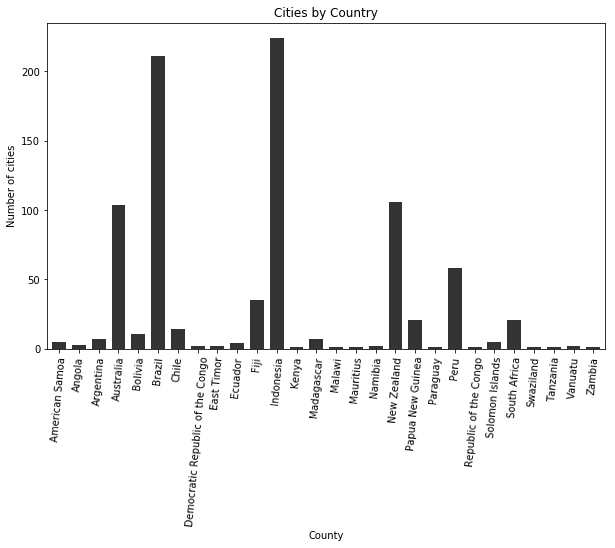

In [12]:
data_land.groupby('country_name')['admin_division_name'].count().plot('bar', 
                                                    colormap='gnuplot', 
                                                    width=0.7, alpha=0.8, 
                                                    figsize=(10,6))
plt.ylabel('Number of cities')
plt.xlabel('County')
plt.xticks(rotation=85)
plt.title('Cities by Country')
plt.show()

In [13]:
data_land.groupby('country_name')['admin_division_name'].count()

country_name
American Samoa                        5
Angola                                3
Argentina                             7
Australia                           104
Bolivia                              11
Brazil                              211
Chile                                14
Democratic Republic of the Congo      2
East Timor                            2
Ecuador                               4
Fiji                                 35
Indonesia                           224
Kenya                                 1
Madagascar                            7
Malawi                                1
Mauritius                             1
Namibia                               2
New Zealand                         106
Papua New Guinea                     21
Paraguay                              1
Peru                                 58
Republic of the Congo                 1
Solomon Islands                       5
South Africa                         21
Swaziland                  

### Checking number of landslides by year

In [14]:
data_land.groupby('year')['event_id'].count()

year
2006      1
2007     29
2008     47
2009     62
2010    241
2011    114
2012     81
2013    102
2014     69
2015     47
2016    103
2017    104
Name: event_id, dtype: int64

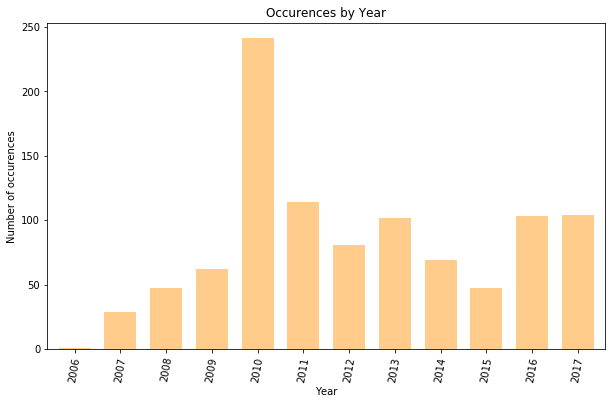

In [15]:
data_land.groupby('year')['event_id'].count().plot('bar', 
                                                    colormap='copper_r', 
                                                    width=0.7, alpha=0.9, 
                                                    figsize=(10,6))
plt.ylabel('Number of occurences')
plt.xlabel('Year')
plt.xticks(rotation=80)
plt.title('Occurences by Year')
plt.show()

### Checking local of occurences

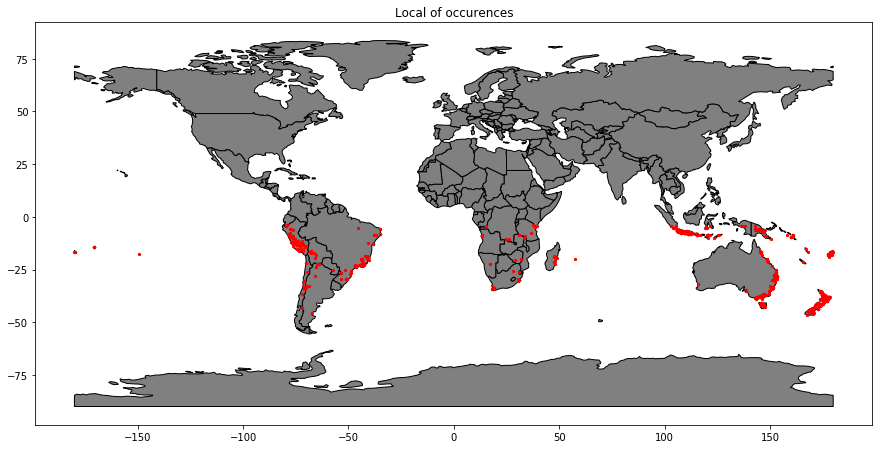

In [86]:
import geopandas
gdf = geopandas.GeoDataFrame(
    data_land, geometry=geopandas.points_from_xy(data_land.longitude, data_land.latitude))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(
    color='grey', edgecolor='black', figsize=(15,9))
gdf.plot(color='red', markersize=5, ax=ax, marker='o')
plt.title('Local of occurences')
plt.show()

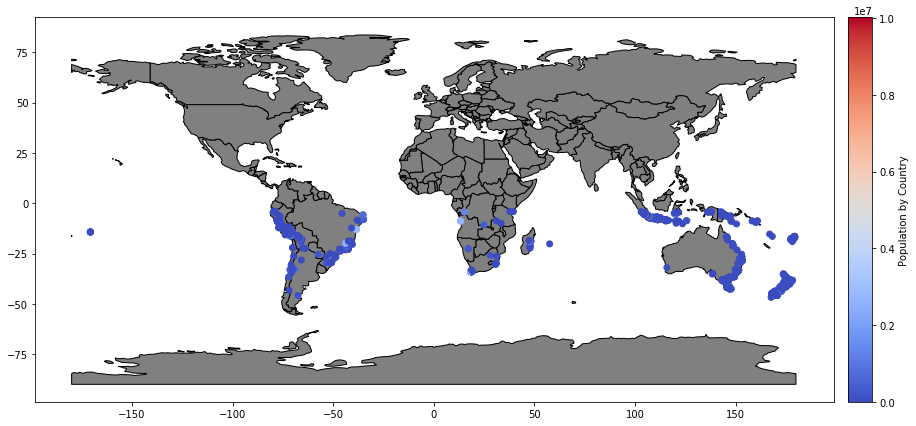

In [175]:
# Check population by local of occurence
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
gdf = geopandas.GeoDataFrame(
    data_land, geometry=geopandas.points_from_xy(data_land.longitude, data_land.latitude))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='grey', edgecolor='black', figsize=(15,9))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
gdf.plot(column='admin_division_population',  
         cmap='coolwarm', ax=ax, legend=True, cax=cax, 
         legend_kwds={'label': "Population by Country"})
plt.show()

In [176]:
#events by country
data_land.groupby('country_name')['event_id'].count()

country_name
American Samoa                        5
Angola                                3
Argentina                             7
Australia                           104
Bolivia                              11
Brazil                              211
Chile                                14
Democratic Republic of the Congo      2
East Timor                            2
Ecuador                               4
Fiji                                 35
Indonesia                           224
Kenya                                 1
Madagascar                            7
Malawi                                1
Mauritius                             1
Namibia                               2
New Zealand                         106
Papua New Guinea                     21
Paraguay                              1
Peru                                 58
Republic of the Congo                 1
Solomon Islands                       5
South Africa                         21
Swaziland                  

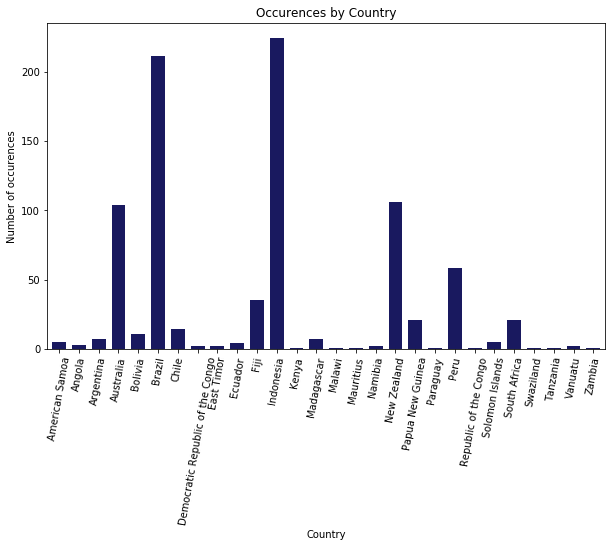

In [177]:
data_land.groupby('country_name')['event_id'].count().plot('bar', 
                                                    colormap='seismic', 
                                                    width=0.7, alpha=0.9, 
                                                    figsize=(10,6))
plt.ylabel('Number of occurences')
plt.xlabel('Country')
plt.xticks(rotation=80)
plt.title('Occurences by Country')
plt.show()

### Checking time of events occurence 

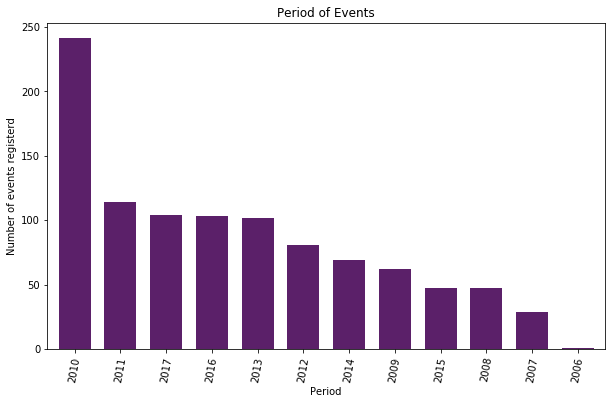

In [178]:
data_land['year'].value_counts().plot('bar', colormap='viridis', width=0.7, alpha=0.88, figsize=(10,6))
plt.xticks(rotation=80)
plt.ylabel('Number of events registerd')
plt.xlabel('Period')
plt.title('Period of Events')
plt.show()

In [179]:
data_land['year'].describe()

count     1000
unique      12
top       2010
freq       241
Name: year, dtype: object

In [180]:
data_land['year'].value_counts(normalize=True)*100

2010    24.1
2011    11.4
2017    10.4
2016    10.3
2013    10.2
2012     8.1
2014     6.9
2009     6.2
2015     4.7
2008     4.7
2007     2.9
2006     0.1
Name: year, dtype: float64

In [181]:
data_land['year'].max()

'2017'

In [182]:
data_land['year'].min()

'2006'

In [183]:
print('Between',data_land['year'].min(), 
      'and', data_land['year'].max(),',', 
      data_land['year'].describe()['count'],
      'events were registed.', 
      data_land['year'].describe()['top'], 
      'was the top year, counting', 
      data_land['year'].describe()['freq'], 'events.' )
    

Between 2006 and 2017 , 1000 events were registed. 2010 was the top year, counting 241 events.


### Checking category of occurences

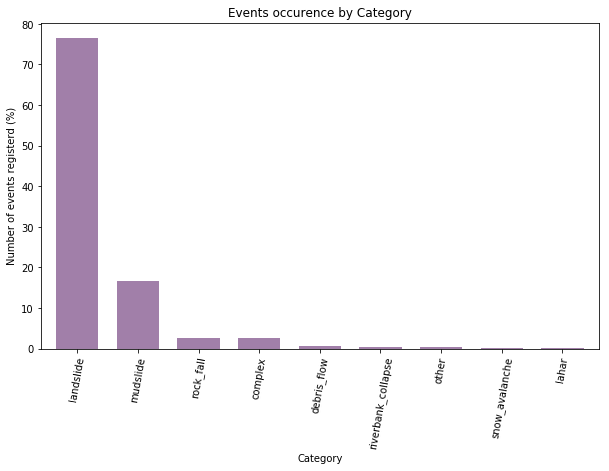

In [184]:
(data['landslide_category'].value_counts(normalize=True)*100).plot('bar', colormap='viridis', width=0.7, alpha=0.5, figsize=(10,6))
plt.ylabel('Number of events registerd (%)')
plt.xlabel('Category')
plt.xticks(rotation=80)
plt.title('Events occurence by Category')
plt.show()

In [185]:
data_land['landslide_category'].describe()

count          1000
unique            9
top       landslide
freq            765
Name: landslide_category, dtype: object

In [186]:
data_land['landslide_category'].value_counts(normalize=True)*100

landslide             76.5
mudslide              16.7
rock_fall              2.7
complex                2.6
debris_flow            0.7
riverbank_collapse     0.3
other                  0.3
snow_avalanche         0.1
lahar                  0.1
Name: landslide_category, dtype: float64

In [187]:
print ('There is',
       data_land['landslide_category'].describe()['unique'], 
       'categories of events registered, where', 
       data_land['landslide_category'].describe()['top'], 
       'is the most recurring, with',
       data_land['landslide_category'].describe()['freq'], 
       'registers.')

There is 9 categories of events registered, where landslide is the most recurring, with 765 registers.


In [188]:
# Category of occurence by country
data_land.groupby('landslide_category')['country_name'].count()

landslide_category
complex                26
debris_flow             7
lahar                   1
landslide             639
mudslide              149
other                   3
riverbank_collapse      2
rock_fall              24
snow_avalanche          1
Name: country_name, dtype: int64

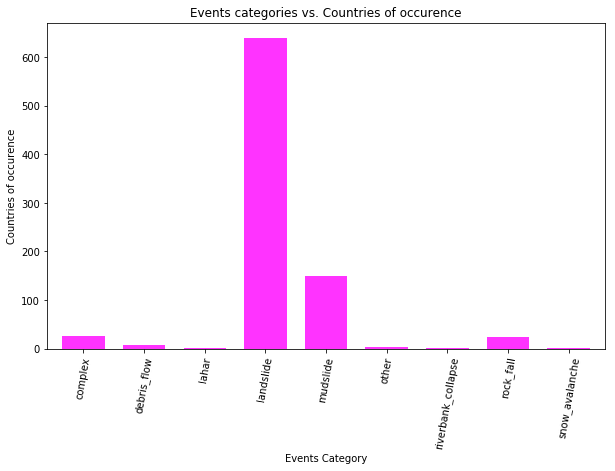

In [189]:
data_land.groupby('landslide_category')['country_name'].count().plot('bar', 
                                                                 colormap='spring', 
                                                                 width=0.7, alpha=0.8, 
                                                                 figsize=(10,6))
plt.ylabel('Countries of occurence')
plt.xlabel('Events Category')
plt.xticks(rotation=80)
plt.title('Events categories vs. Countries of occurence')
plt.show()

In [190]:
data_land['storm_name'].describe()

count          22
unique         15
top       El Nino
freq            3
Name: storm_name, dtype: object

In [191]:
data_land['storm_name'].value_counts()

El Nino                       3
Cyclone Debbie                3
Cyclone Wilma                 3
Tropical Cyclone Wilma        2
Tropical Storm Irina          1
Collapsed retaining wall      1
Giovanna                      1
Tropical Storm Debbie         1
Heaviest Rain in 48 years     1
Cyclone Enawo                 1
Tropical Depression TD04F     1
Tropical Cyclone Hubert       1
Lusi                          1
Tropical Cyclone Winston      1
ex-Tropical Cyclone Debbie    1
Name: storm_name, dtype: int64

In [192]:
data_land['storm_name'].isnull().sum()

978

In [193]:
print('Between all events,',
      data_land['storm_name'].describe()['count'],
      'received a storm name, as follow bellow:','\n',
      data_land['storm_name'].value_counts().dropna() )

Between all events, 22 received a storm name, as follow bellow: 
 El Nino                       3
Cyclone Debbie                3
Cyclone Wilma                 3
Tropical Cyclone Wilma        2
Tropical Storm Irina          1
Collapsed retaining wall      1
Giovanna                      1
Tropical Storm Debbie         1
Heaviest Rain in 48 years     1
Cyclone Enawo                 1
Tropical Depression TD04F     1
Tropical Cyclone Hubert       1
Lusi                          1
Tropical Cyclone Winston      1
ex-Tropical Cyclone Debbie    1
Name: storm_name, dtype: int64


### Registers of injuries and fatalities 

In [194]:
#Fatalities by country
data_land.groupby('country_name')['fatality_count'].count()

country_name
American Samoa                        4
Angola                                3
Argentina                             6
Australia                            89
Bolivia                              11
Brazil                              197
Chile                                12
Democratic Republic of the Congo      1
East Timor                            2
Ecuador                               3
Fiji                                 25
Indonesia                           189
Kenya                                 1
Madagascar                            7
Malawi                                1
Mauritius                             1
Namibia                               2
New Zealand                          97
Papua New Guinea                     17
Paraguay                              0
Peru                                 55
Republic of the Congo                 0
Solomon Islands                       4
South Africa                         17
Swaziland                  

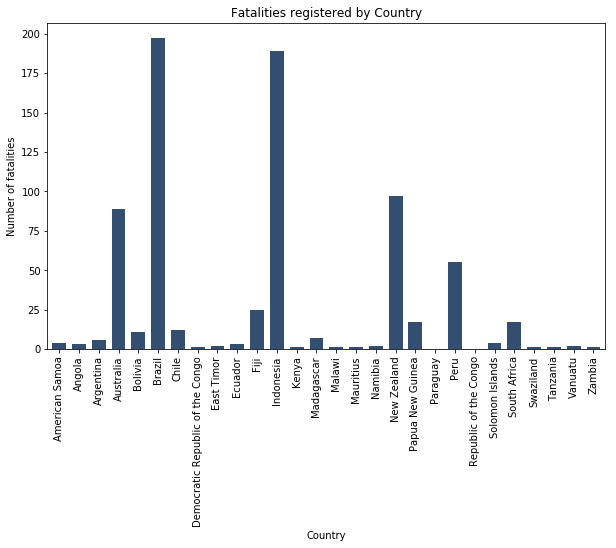

In [195]:
data_land.groupby('country_name')['fatality_count'].count().plot('bar', 
                                                                 colormap='cividis', 
                                                                 width=0.7, alpha=0.8, 
                                                                 figsize=(10,6))
plt.ylabel('Number of fatalities')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Fatalities registered by Country')
plt.show()

In [196]:
#Fatalities by event category
data_land.groupby('landslide_category')['fatality_count'].count()

landslide_category
complex                21
debris_flow             5
lahar                   1
landslide             676
mudslide              156
other                   2
riverbank_collapse      3
rock_fall              25
snow_avalanche          1
Name: fatality_count, dtype: int64

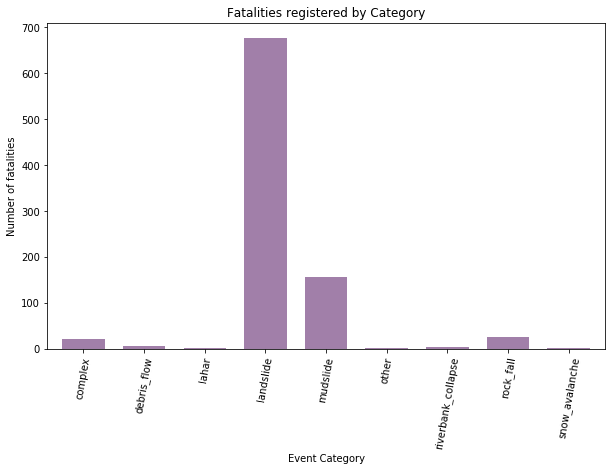

In [197]:
data_land.groupby('landslide_category')['fatality_count'].count().plot('bar', 
                                                                 colormap='viridis', 
                                                                 width=0.7, alpha=0.5, 
                                                                 figsize=(10,6))
plt.ylabel('Number of fatalities')
plt.xlabel('Event Category')
plt.xticks(rotation=80)
plt.title('Fatalities registered by Category')
plt.show()

In [198]:
#Injuries by country
data_land.groupby('country_name')['injury_count'].count()

country_name
American Samoa                       0
Angola                               0
Argentina                            2
Australia                           25
Bolivia                              6
Brazil                              15
Chile                                4
Democratic Republic of the Congo     1
East Timor                           0
Ecuador                              3
Fiji                                 7
Indonesia                           66
Kenya                                1
Madagascar                           4
Malawi                               0
Mauritius                            1
Namibia                              0
New Zealand                         27
Papua New Guinea                     9
Paraguay                             0
Peru                                13
Republic of the Congo                0
Solomon Islands                      3
South Africa                         5
Swaziland                            0
Tanzania    

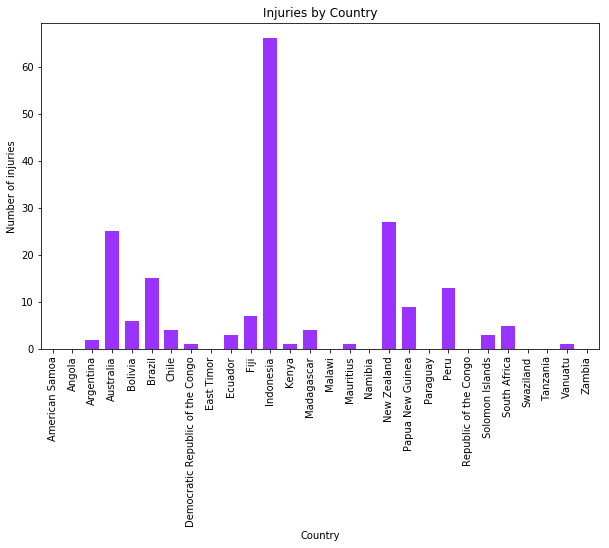

In [199]:
data_land.groupby('country_name')['injury_count'].count().plot('bar', 
                                                               colormap='rainbow', 
                                                               width=0.7, alpha=0.8, 
                                                               figsize=(10,6))
plt.ylabel('Number of injuries')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Injuries by Country')
plt.show()

In [200]:
#Injuries by event categorie
data_land.groupby('landslide_category')['injury_count'].count()

landslide_category
complex                 1
debris_flow             4
lahar                   0
landslide             263
mudslide               39
other                   2
riverbank_collapse      2
rock_fall              17
snow_avalanche          0
Name: injury_count, dtype: int64

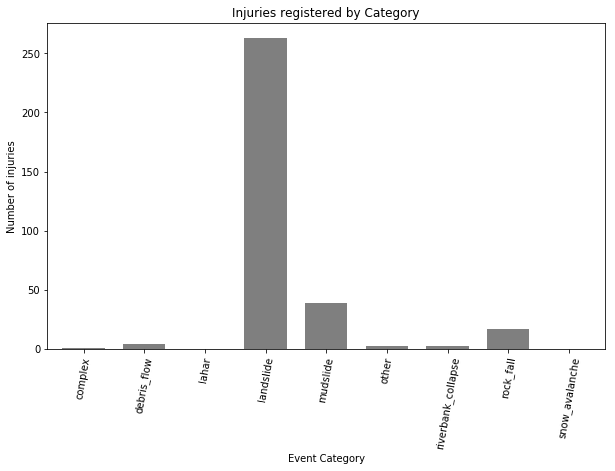

In [201]:
data_land.groupby('landslide_category')['injury_count'].count().plot('bar', 
                                                                 colormap='gist_heat', 
                                                                 width=0.7, alpha=0.5, 
                                                                 figsize=(10,6))
plt.ylabel('Number of injuries')
plt.xlabel('Event Category')
plt.xticks(rotation=80)
plt.title('Injuries registered by Category')
plt.show()

### Report media

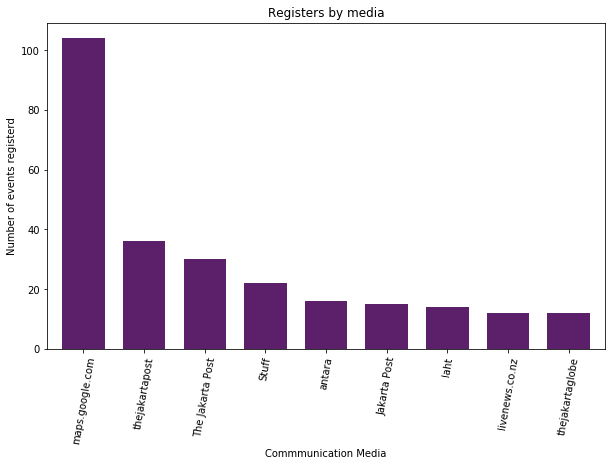

In [202]:
#top 10
data_land['source_name'].value_counts()[0:9].plot('bar', colormap='viridis', width=0.7, alpha=0.88, figsize=(10,6))
plt.xticks(rotation=80)
plt.ylabel('Number of events registerd')
plt.xlabel('Commmunication Media')
plt.title('Registers by media')
plt.show()

In [203]:
data_land['source_name'].describe()

count                1000
unique                435
top       maps.google.com
freq                  104
Name: source_name, dtype: object

In [204]:
data_land['source_name'].value_counts()

maps.google.com                           104
thejakartapost                             36
The Jakarta Post                           30
Stuff                                      22
antara                                     16
Jakarta Post                               15
laht                                       14
livenews.co.nz                             12
thejakartaglobe                            12
antaranews                                 12
stuff                                      11
fijitimes                                  10
cnn                                        10
www.thejakartapost.com                      9
news.bbc                                    9
Tempo                                       8
reliefweb.int                               7
abc                                         7
The National                                7
radionz                                     7
translate.google                            7
Jakarta Globe                     

In [205]:
#communication media by country
data_land.groupby('country_name')['source_name'].count()

country_name
American Samoa                        5
Angola                                3
Argentina                             7
Australia                           104
Bolivia                              11
Brazil                              211
Chile                                14
Democratic Republic of the Congo      2
East Timor                            2
Ecuador                               4
Fiji                                 35
Indonesia                           224
Kenya                                 1
Madagascar                            7
Malawi                                1
Mauritius                             1
Namibia                               2
New Zealand                         106
Papua New Guinea                     21
Paraguay                              1
Peru                                 58
Republic of the Congo                 1
Solomon Islands                       5
South Africa                         21
Swaziland                  

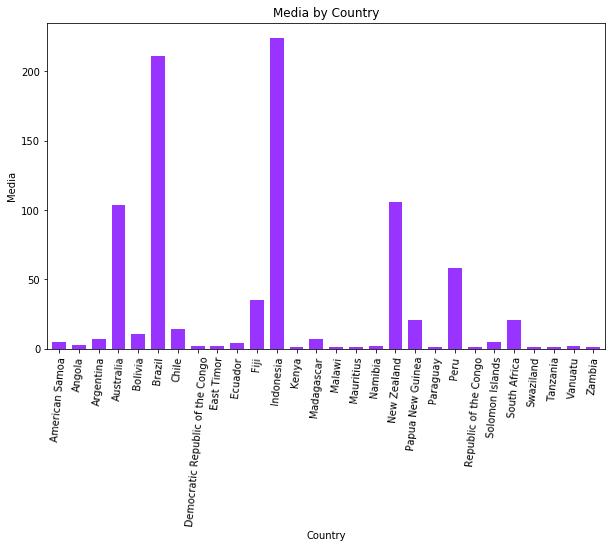

In [206]:
data_land.groupby('country_name')['source_name'].count().plot('bar', 
                                                               colormap='rainbow', 
                                                               width=0.7, alpha=0.8, 
                                                               figsize=(10,6))
plt.ylabel('Media')
plt.xlabel('Country')
plt.xticks(rotation=85)
plt.title('Media by Country')
plt.show()

In [242]:
print (' ',data_land['source_name'].describe()['unique'], 
       'communication media have been reported the occurences in',
       data_land.country_name.describe()['unique'],'countries.','\n ', 
       data_land['source_name'].describe()['top'], 
       'registered the higher number, counting',
       data_land['source_name'].describe()['freq'], 
       'occurences.')

  435 communication media have been reported the occurences in 28 countries. 
  maps.google.com registered the higher number, counting 104 occurences.
